In [3]:
import tensorboard
logdir = "logdir_CNN_hp"
%load_ext tensorboard
%tensorboard --logdir logdir

!rm -r logdir
!rm -r "untitled_project"
!rm -r "logdir_CNN_hp"



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16023), started 0:00:12 ago. (Use '!kill 16023' to kill it.)

rm: cannot remove 'logdir': No such file or directory
rm: cannot remove 'untitled_project': No such file or directory
rm: cannot remove 'logdir_CNN_hp': No such file or directory


In [ ]:
%run model.py
%run main.py

Epoch 1/2


In [2]:
%ls

Cardio_Data/     main.py*    plotter.py          untitled_project/
Data.py*         main.py~*   __pycache__/
final_model.py*  model.py*   Runner.ipynb
logdir_CNN_hp/   model.py~*  StandardScaler.py*


In [202]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

df = pd.read_csv("Cardio_Data/Cleaned_data/Devesh/7.0.csv")

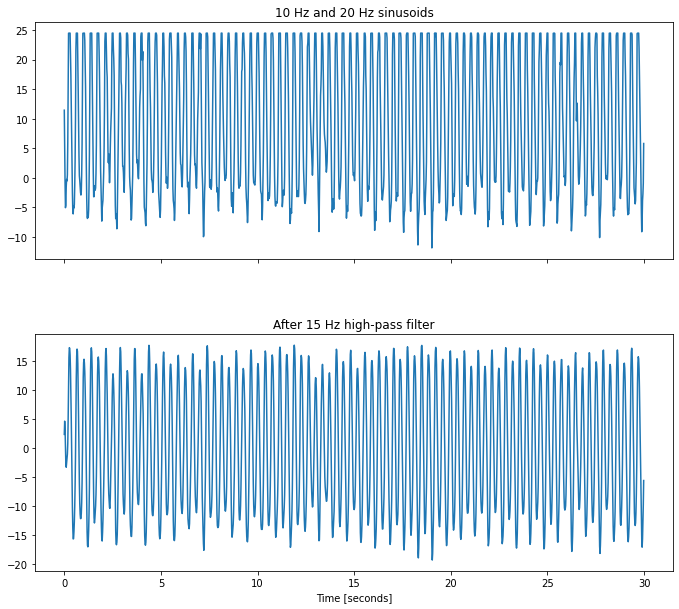

In [203]:

t = np.linspace(0, 30, 1500, False)  # 1 second
sig = df['Accel_LN_X_CAL'][:1500]#np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
#ax1.axis([0, 1, -2, 2])

sos = signal.butter(1, Wn=(1,5), btype='bandpass', fs=50, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
#ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
fig.set_size_inches(10,10)
plt.show()

In [204]:
f = np.concatenate((np.array([0,1,2,3,4,5]) , np.zeros(19)))

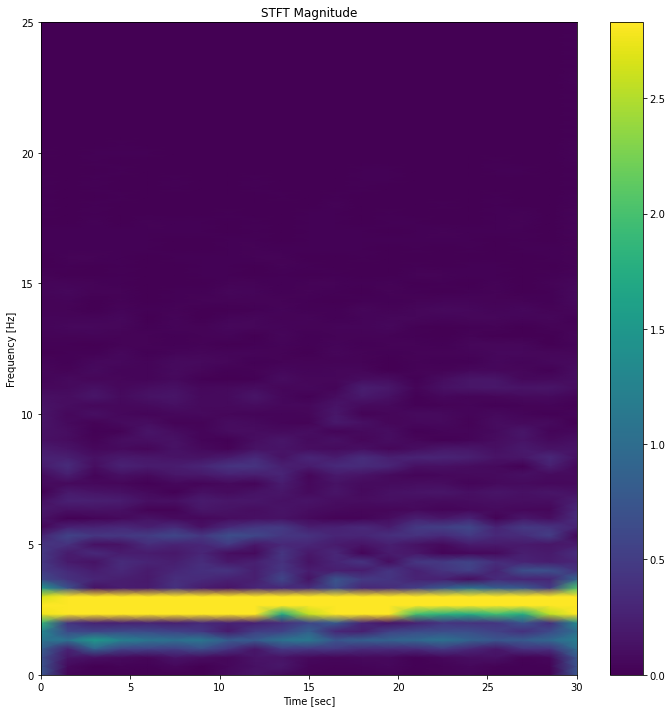

In [205]:
f, t, Zxx = signal.stft(filtered[:1500], 50, nperseg = 150)

plt.figure(figsize=(12,12))
#f=np.concatenate((np.array([0,1,2,3,4,5]) , np.zeros(20)))
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()